Melakukan *import* untuk *library* yang dibutuhkan.

In [ ]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


Melakukan konfigurasi *default* untuk penggunaan Matplotlib untuk visualisasi terkait ukuran gambar dan warna yang digunakan.

In [ ]:
# matplotlib configuration for pictures' size and colors used

mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

URL dataset diletakkan di Github agar memudahkan untuk kompatibilitas penggunaan dengan Google Colabs.

In [ ]:
# dataset URL, uploaded on Github for compatibility with Google Colabs

dataset_url = "https://raw.githubusercontent.com/andriansyahp/DatasetTugas/master/HMEQ%20(Clean).csv"

Membaca dataset ke dalam *dataframe* dan mendefinisikan *header* masing-masing fitur.

In [ ]:
col_names=["Bad", "Loan", "Mortdue", "Value", "Reason", "Job", "Yoj", "Derog", "Delinq", "Clage", "Ninq", "Clno", "Debtinc"]
df = pd.read_csv(dataset_url, header=None, names=col_names)

In [ ]:
df.head()

,Bad,Loan,Mortdue,Value,Reason,Job,Yoj,Derog,Delinq,Clage,Ninq,Clno,Debtinc
0,1,1700,30548,40320,HomeImp,Other,9,0,0,101.466002,1,8,37.113614
1,1,1800,28502,43034,HomeImp,Other,11,0,0,88.766030,0,8,36.884894
2,0,2300,102370,120953,HomeImp,Office,2,0,0,90.992533,0,13,31.588503
3,1,2400,34863,47471,HomeImp,Mgr,12,0,0,70.491080,1,21,38.263601
4,0,2400,98449,117195,HomeImp,Office,4,0,0,93.811775,0,13,29.681827


Melihat informasi deskripsi singkat dari dataset. Terlihat bahwa belum semua fitur bertipe numerik (masih *categorical*) seperti `Reason` dan `Job`.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3361 entries, 0 to 3360
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Bad      3361 non-null   int64  
 1   Loan     3361 non-null   int64  
 2   Mortdue  3361 non-null   int64  
 3   Value    3361 non-null   int64  
 4   Reason   3361 non-null   object 
 5   Job      3361 non-null   object 
 6   Yoj      3361 non-null   int64  
 7   Derog    3361 non-null   int64  
 8   Delinq   3361 non-null   int64  
 9   Clage    3361 non-null   float64
 10  Ninq     3361 non-null   int64  
 11  Clno     3361 non-null   int64  
 12  Debtinc  3361 non-null   float64
dtypes: float64(2), int64(9), object(2)
memory usage: 341.5+ KB


Mengubah data *categorical* menjadi numerik.

In [ ]:
# categorizing object type and transform to numeric
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category').cat.codes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3361 entries, 0 to 3360
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Bad      3361 non-null   int64  
 1   Loan     3361 non-null   int64  
 2   Mortdue  3361 non-null   int64  
 3   Value    3361 non-null   int64  
 4   Reason   3361 non-null   int8   
 5   Job      3361 non-null   int8   
 6   Yoj      3361 non-null   int64  
 7   Derog    3361 non-null   int64  
 8   Delinq   3361 non-null   int64  
 9   Clage    3361 non-null   float64
 10  Ninq     3361 non-null   int64  
 11  Clno     3361 non-null   int64  
 12  Debtinc  3361 non-null   float64
dtypes: float64(2), int64(9), int8(2)
memory usage: 295.5 KB


Mengecek apakah ada data yang bernilai *null*, dan ternyata data sudah benar-benar bersih.

In [ ]:
df.isnull().sum()

Bad        0
Loan       0
Mortdue    0
Value      0
Reason     0
Job        0
Yoj        0
Derog      0
Delinq     0
Clage      0
Ninq       0
Clno       0
Debtinc    0
dtype: int64

Melihat statisitik deskriptif dari masing-masing fitur untuk melihat gambaran awal dari data.

In [ ]:
df.describe()

,Bad,Loan,Mortdue,Value,Reason,Job,Yoj,Derog,Delinq,Clage,Ninq,Clno,Debtinc
count,3361.000000,3361.000000,3361.000000,3361.000000,3361.000000,3361.000000,3361.000000,3361.000000,3361.000000,3361.000000,3361.000000,3361.000000,3361.000000
mean,0.088962,19156.709313,76243.709908,107462.591491,0.296043,1.947635,9.105921,0.146980,0.279084,180.978160,1.038084,22.106218,36.107637
std,0.284731,10875.615899,45057.559737,54649.900322,0.456578,1.140800,7.588805,0.579766,0.809949,82.802736,1.549878,9.383164,86.742168
min,0.000000,1700.000000,5076.000000,21144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.000000,-21.719596
25%,0.000000,12000.000000,49361.000000,71257.000000,0.000000,1.000000,3.000000,0.000000,0.000000,118.653064,0.000000,16.000000,29.381985
50%,0.000000,17000.000000,67285.000000,94454.000000,0.000000,2.000000,7.000000,0.000000,0.000000,176.734932,1.000000,21.000000,35.127874
75%,0.000000,23800.000000,92986.000000,122335.000000,1.000000,3.000000,13.000000,0.000000,0.000000,230.398576,2.000000,27.000000,39.098874
max,1.000000,89900.000000,399412.000000,512650.000000,1.000000,5.000000,41.000000,10.000000,10.000000,1168.233561,13.000000,64.000000,4537.512708


Karena bertipe *problem* klasifikasi, terutama identifikasi peminjaman dan kredit rumah yang *fraud* maka perlu diperhatikan keseimbangan data.

In [ ]:
df.groupby("Bad").describe()

Loan                              ...    Debtinc                        
      count          mean           std  ...        50%        75%          max
Bad                                      ...                                   
0    3062.0  19278.347485  10898.710611  ...  34.874107  38.825426  4537.512708
1     299.0  17911.036789  10573.627059  ...  38.211305  43.822502  2224.478881

[2 rows x 96 columns]

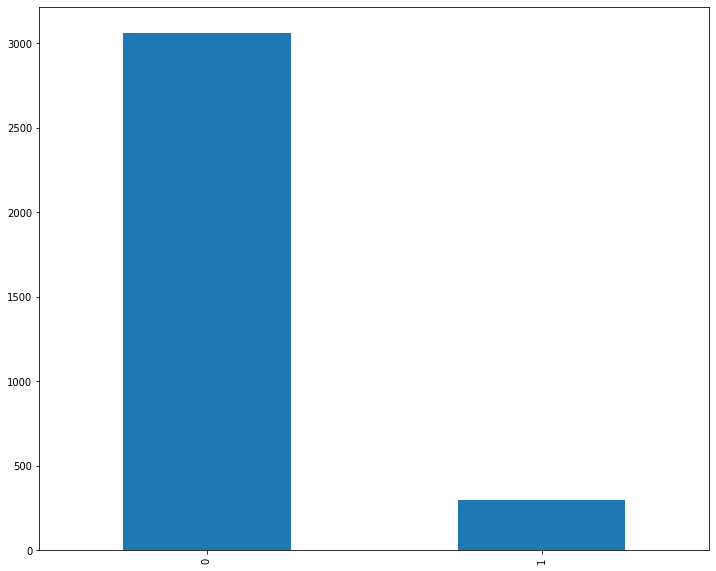

In [ ]:
df.Bad.value_counts().plot.bar()

Terlihat bahwa data *imbalance* dengan *record* yang bertipe *fraud* hanya bernilai 8.90% dari keseluruhan data.

In [ ]:
neg, pos = np.bincount(df['Bad'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 3361
    Positive: 299 (8.90% of total)



Melihat korelasi antar fitur untuk mengecek *multicollinearity*. Terlihat `Value` dan `Mortdue` secara sekilas hampir serupa dengan korelasi yang cukup kuat antara keduanya dengan nilai 0.87, sehingga salah satunya bisa dihilangkan. `Mortdue` dipilih untuk dihilangkan karena korelasinya dengan kelas target (`Bad`) lebih rendah (lebih mendekati 0).

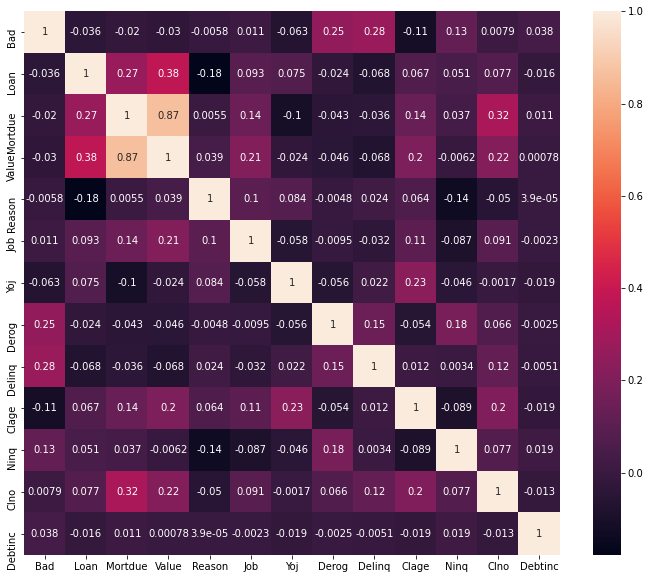

In [ ]:
sns.heatmap(data = df.corr(), annot=True, cbar=True)

Memisahkan fitur dengan target serta membagi ke dalam *training* dan *testing set* dengan komposisi 60%:40%.

In [ ]:
feat = df.drop(['Bad', 'Value'], axis=1).values

res = df['Bad'].values

X_model, X_valid, y_model, y_valid = train_test_split(feat, res, test_size=0.4, random_state=42)

Menmbuat fungsi untuk membuat model yang di-*training* dengan *library* `Keras`.

In [ ]:
# Pengukuran yang digunakan. Lebih banyak lebih baik karena lebih banyak informasi yang dapat diketahui.
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

# Epoch dan ukuran batch
EPOCHS = 75
BATCH_SIZE = 512

# Kondisi kapan untuk early stopping (jika sudah konvergen sebelum epoch yang ditentukan)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

def train_keras(X_train, y_train, X_valid, y_valid):
    # Model terdiri dari 1 Dense layer input, 1 Dropout layer dan 1 Dense layer output
    model = keras.Sequential([
        keras.layers.Dense(
            120, activation='relu',
            input_shape=(X_train.shape[-1],)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid'),
    ])

    # Kompilasi model dengan menggunakan Adam sebagai optimizer dan metode Binary Cross Entropy untuk menghitung loss
    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=METRICS)

    # Melakukan fitting data pada model
    model.fit(
      X_train,
      y_train,
      batch_size=BATCH_SIZE,
      epochs=EPOCHS,
      callbacks = [early_stopping],
      validation_data=(X_valid, y_valid))
    
    # Melihat ringkasan dari model yang dibuat
    model.summary()

    return model

Membuat fungsi untuk plot *confusion matrix*. 

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

Membuat fungsi untuk memprediksi dan melihat performanya melalui evaluasi untuk data *training* dan data *testing*.

In [ ]:
def predict_keras(model, X_train, X_test, y_train, y_test):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    print("==================")
    print()
    print("Train")
    scores_train = model.evaluate(X_train, y_train, verbose=0)
    for name, value in zip(model.metrics_names, scores_train):
      print(name, ': ', value)
    print()
    print("==================")

    plot_cm(y_train, pred_train)

    print("==================")
    print()
    print("Test")
    scores_test = model.evaluate(X_test, y_test, verbose=0)
    for name, value in zip(model.metrics_names, scores_test):
      print(name, ': ', value)
    print()
    print("==================")

    plot_cm(y_test, pred_test)

Percobaan pertama, klasifikasi dengan *train-test split*.

In [ ]:
plain_model = train_keras(X_model, y_model, X_valid, y_valid)

Epoch 1/75
4/4 [==============================] - 1s 215ms/step - loss: 2875.2202 - tp: 53.0000 - fp: 624.0000 - tn: 1216.0000 - fn: 123.0000 - accuracy: 0.6295 - precision: 0.0783 - recall: 0.3011 - auc: 0.4810 - val_loss: 576.1675 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 1222.0000 - val_fn: 123.0000 - val_accuracy: 0.9086 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 2/75
4/4 [==============================] - 0s 13ms/step - loss: 2044.6843 - tp: 41.0000 - fp: 378.0000 - tn: 1462.0000 - fn: 135.0000 - accuracy: 0.7455 - precision: 0.0979 - recall: 0.2330 - auc: 0.5138 - val_loss: 875.7892 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 1222.0000 - val_fn: 123.0000 - val_accuracy: 0.9086 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 3/75
4/4 [==============================] - 0s 12ms/step - loss: 1706.8490 - tp: 20.0000 - fp: 251.0000 - tn: 1589.0000 - fn: 156.0000 - accuracy: 0.7981 - precision: 0.0738 - rec


Train
loss :  562.5733032226562
tp :  0.0
fp :  0.0
tn :  1840.0
fn :  176.0
accuracy :  0.9126983880996704
precision :  0.0
recall :  0.0
auc :  0.5

Legitimate Transactions Detected (True Negatives):  1840
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  176
Fraudulent Transactions Detected (True Positives):  0
Total Fraudulent Transactions:  176

Test
loss :  576.1675415039062
tp :  0.0
fp :  0.0
tn :  1222.0
fn :  123.0
accuracy :  0.9085502028465271
precision :  0.0
recall :  0.0
auc :  0.5

Legitimate Transactions Detected (True Negatives):  1222
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  123
Fraudulent Transactions Detected (True Positives):  0
Total Fraudulent Transactions:  123


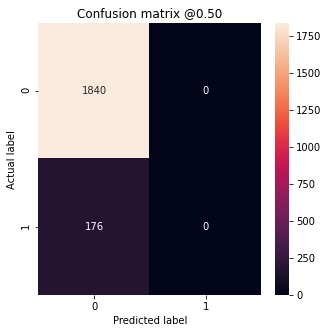

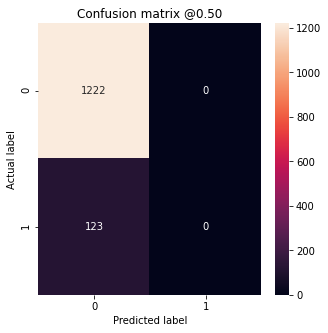

In [ ]:
predict_keras(plain_model, X_model, X_valid, y_model, y_valid)

Dari nilai yang dimunculkan, tingkat akurasinya sangat baik dengan mencapai ~ 90%. Namun, dari *confusion matrix* diketahui bahwa ternyata semua data justru diprediksi sebagai *non-fraud*, dimana tidak sesuai dengan tujuan awal yaitu identifikasi *fraud*. Hal ini bisa disebabkan karena *imbalanced data* sehingga mengakibatkan kurangnya informasi yang membuat model dapat mengklasifikasi suatu *record* sebagai *fraud*.

Oleh karena itu, akan dilakukan *imbalanced handling*. Sebelumnya perlu dilakukan normalisasi menggunakan `StandarScaler()`.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_model_sc = scaler.fit_transform(X_model)
X_valid_sc  = scaler.transform(X_valid)

In [ ]:
from collections import Counter

Metode *imbalanced handling* yang dipilih adalah dengan *random oversampling* karena mudah dan performa cukup menjanjikan.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

print('Original dataset shape %s' % Counter(y_model))
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_model_sc, y_model)
print('Resampled dataset shape %s' % Counter(y_ros))

Original dataset shape Counter({0: 1840, 1: 176})
Resampled dataset shape Counter({0: 1840, 1: 1840})


Percobaan kedua: *training* model dengan data yang sudah *balance* dan dinormalisasi dengan *train-test split*.

In [ ]:
model = train_keras(X_ros, y_ros, X_valid_sc, y_valid)

Epoch 1/75
8/8 [==============================] - 1s 88ms/step - loss: 0.6766 - tp: 1186.0000 - fp: 974.0000 - tn: 2088.0000 - fn: 777.0000 - accuracy: 0.6515 - precision: 0.5491 - recall: 0.6042 - auc: 0.7280 - val_loss: 0.7047 - val_tp: 101.0000 - val_fp: 591.0000 - val_tn: 631.0000 - val_fn: 22.0000 - val_accuracy: 0.5442 - val_precision: 0.1460 - val_recall: 0.8211 - val_auc: 0.7513
Epoch 2/75
8/8 [==============================] - 0s 9ms/step - loss: 0.6407 - tp: 1294.0000 - fp: 893.0000 - tn: 947.0000 - fn: 546.0000 - accuracy: 0.6090 - precision: 0.5917 - recall: 0.7033 - auc: 0.6738 - val_loss: 0.6949 - val_tp: 102.0000 - val_fp: 513.0000 - val_tn: 709.0000 - val_fn: 21.0000 - val_accuracy: 0.6030 - val_precision: 0.1659 - val_recall: 0.8293 - val_auc: 0.7863
Epoch 3/75
8/8 [==============================] - 0s 8ms/step - loss: 0.6159 - tp: 1287.0000 - fp: 759.0000 - tn: 1081.0000 - fn: 553.0000 - accuracy: 0.6435 - precision: 0.6290 - recall: 0.6995 - auc: 0.7128 - val_loss: 0


Train
loss :  0.4039275348186493
tp :  1472.0
fp :  281.0
tn :  1559.0
fn :  368.0
accuracy :  0.823641300201416
precision :  0.839703381061554
recall :  0.800000011920929
auc :  0.9092229008674622

Legitimate Transactions Detected (True Negatives):  1559
Legitimate Transactions Incorrectly Detected (False Positives):  281
Fraudulent Transactions Missed (False Negatives):  368
Fraudulent Transactions Detected (True Positives):  1472
Total Fraudulent Transactions:  1840

Test
loss :  0.7327016592025757
tp :  84.0
fp :  215.0
tn :  1007.0
fn :  39.0
accuracy :  0.8111523985862732
precision :  0.28093644976615906
recall :  0.6829268336296082
auc :  0.8308782577514648

Legitimate Transactions Detected (True Negatives):  1007
Legitimate Transactions Incorrectly Detected (False Positives):  215
Fraudulent Transactions Missed (False Negatives):  39
Fraudulent Transactions Detected (True Positives):  84
Total Fraudulent Transactions:  123


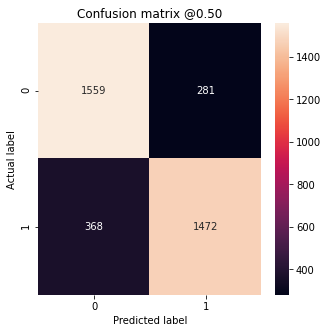

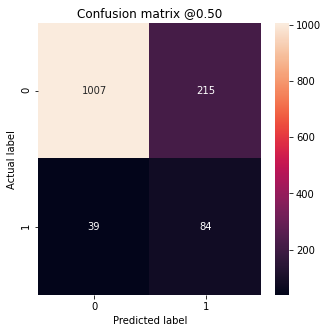

In [ ]:
predict_keras(model, X_ros, X_valid_sc, y_ros, y_valid)

Terlihat nilai akurasi cukup jauh berkurang jika dibandingkan dengan metode awal karena dari hasil *resampling* ini akan menyebabkan peluang sebuah *record* yang sebenarnya *non fraud* tetapi dapat dikategorikan sebagai *fraud*. Hal ini ditandai dengan *precision* yang cukup rendah di data *testing*. Akan tetapi, setidaknya sekarang model sudah bisa mengkategorisasi data yang *fraud* sesuai yang diinginkan. *Trade-off* ini kami pilih karena lebih memenuhi tujuan dari analisis data ini sendiri yaitu untuk identifikasi *fraud*.

Selanjutnya, dilakukan juga percobaan dengan *cross-validation* dengan *5-folds*.

In [ ]:
# cv with 10 folds
def train_predict_with_CV(X_train, y_train, X_valid, y_valid):
    kFold = StratifiedKFold(n_splits=5)
    fold_no = 1
    acc_per_fold = []
    for train_idx, test_idx in kFold.split(X_train, y_train):
        # define model
        model = keras.Sequential([
            keras.layers.Dense(
                240, activation='relu',
                input_shape=(X_train.shape[-1],)),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(1, activation='sigmoid'),
        ])
        
        # compile model
        model.compile(
            optimizer=keras.optimizers.Adam(),
            loss=keras.losses.BinaryCrossentropy(),
            metrics=METRICS)
        
        # train model
        print('------------------------------------------------------------------------')
        print('Fold no: %d' %(fold_no))
        model.fit(
            X_train[train_idx],
            y_train[train_idx],
            batch_size=BATCH_SIZE,
            epochs=EPOCHS,
            callbacks = [early_stopping],
            validation_data=(X_train[test_idx], y_train[test_idx]))
        
        # test model
        accuracy = model.evaluate(X_train[test_idx], y_train[test_idx])
        print('Accuracy for fold %d: %.2f' % (fold_no, accuracy[fold_no]*100))
        acc_per_fold.append(accuracy*100)
        
        predict_keras(model, X_train[train_idx], X_train[test_idx], y_train[train_idx], y_train[test_idx])

        fold_no += 1
    
    model.summary()

    return model

Dari training terlihat data tersebar dengan baik di masing-masing *fold* ditandai dengan nilai *metrics* yang relatif konsisten di masing-masing *fold*.

------------------------------------------------------------------------
Fold no: 1
Epoch 1/75
6/6 [==============================] - 1s 112ms/step - loss: 0.6953 - tp: 890.0000 - fp: 884.0000 - tn: 1810.0000 - fn: 705.0000 - accuracy: 0.6295 - precision: 0.5017 - recall: 0.5580 - auc: 0.6788 - val_loss: 0.6486 - val_tp: 281.0000 - val_fp: 192.0000 - val_tn: 176.0000 - val_fn: 87.0000 - val_accuracy: 0.6209 - val_precision: 0.5941 - val_recall: 0.7636 - val_auc: 0.6982
Epoch 2/75
6/6 [==============================] - 0s 10ms/step - loss: 0.6516 - tp: 1047.0000 - fp: 740.0000 - tn: 732.0000 - fn: 425.0000 - accuracy: 0.6043 - precision: 0.5859 - recall: 0.7113 - auc: 0.6647 - val_loss: 0.6179 - val_tp: 309.0000 - val_fp: 189.0000 - val_tn: 179.0000 - val_fn: 59.0000 - val_accuracy: 0.6630 - val_precision: 0.6205 - val_recall: 0.8397 - val_auc: 0.7659
Epoch 3/75
6/6 [==============================] - 0s 10ms/step - loss: 0.6257 - tp: 1095.0000 - fp: 690.0000 - tn: 782.0000 - fn: 377.000

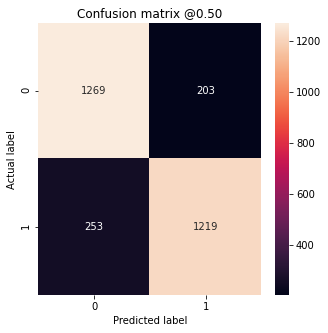

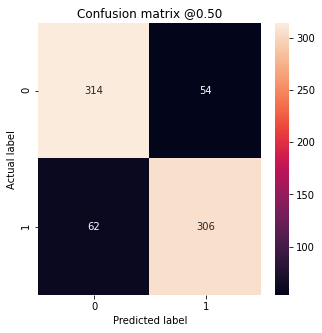

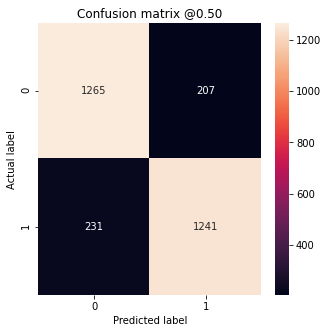

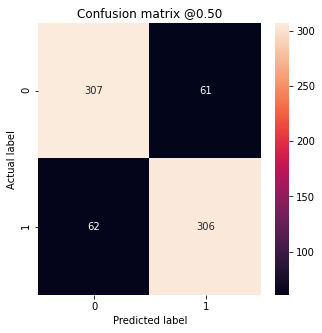

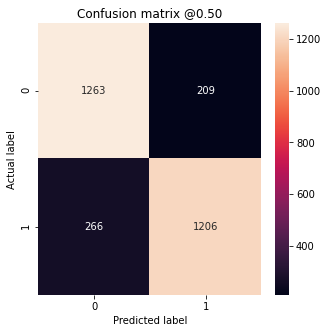

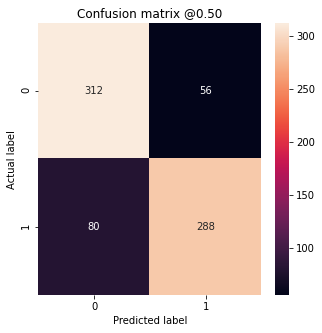

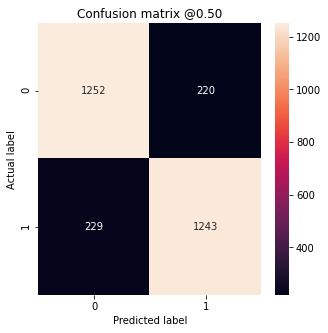

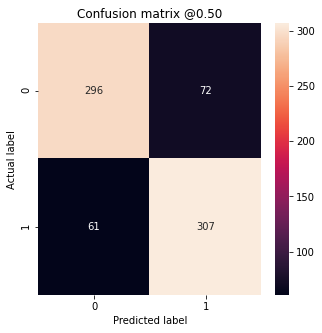

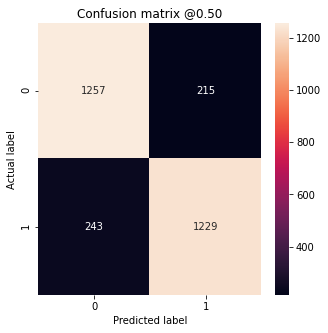

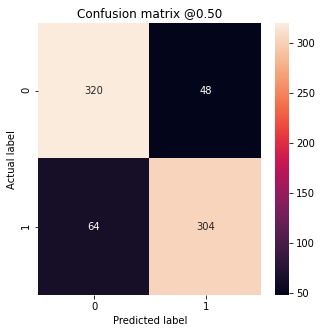

In [ ]:
model_CV = train_predict_with_CV(X_ros, y_ros, X_valid_sc, y_valid)


Train
loss :  0.37258413434028625
tp :  147.0
fp :  263.0
tn :  1577.0
fn :  29.0
accuracy :  0.8551587462425232
precision :  0.35853657126426697
recall :  0.8352272510528564
auc :  0.923293948173523

Legitimate Transactions Detected (True Negatives):  1577
Legitimate Transactions Incorrectly Detected (False Positives):  263
Fraudulent Transactions Missed (False Negatives):  29
Fraudulent Transactions Detected (True Positives):  147
Total Fraudulent Transactions:  176

Test
loss :  0.5711201429367065
tp :  77.0
fp :  195.0
tn :  1027.0
fn :  46.0
accuracy :  0.8208178281784058
precision :  0.28308823704719543
recall :  0.6260162591934204
auc :  0.8063549995422363

Legitimate Transactions Detected (True Negatives):  1027
Legitimate Transactions Incorrectly Detected (False Positives):  195
Fraudulent Transactions Missed (False Negatives):  46
Fraudulent Transactions Detected (True Positives):  77
Total Fraudulent Transactions:  123


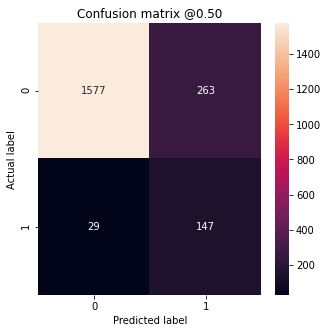

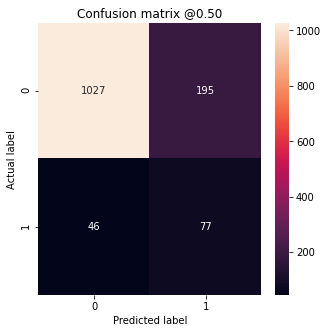

In [ ]:
predict_keras(model_CV, scaler.fit_transform(X_model), scaler.fit_transform(X_valid), y_model, y_valid)

Dari percobaan terakhir terlihat bahwa *training* model dengan *cross-validation* menghasilkan performa yang sedikit lebih baik dibandingkan *train-test split* meskipun relatif tidak signifikan. Selain itu, *cross-validation* juga dapat menjamin kemerataan data dan konsistensi model.

**Referensi**
<br/>
https://www.tensorflow.org/tutorials/structured_data/imbalanced_data